In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import imageio
import numpy as np

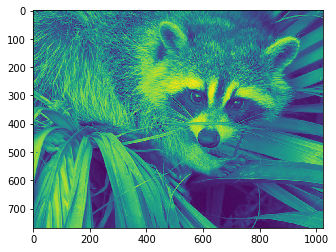

In [2]:
f = misc.face(gray=True)
imageio.imwrite('face.png', f)
plt.imshow(f)
plt.show()

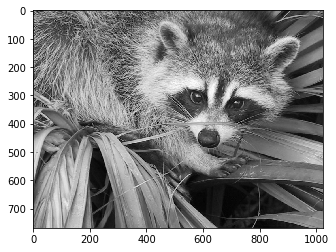

In [3]:
plt.imshow(f, cmap='gray')  
plt.show()

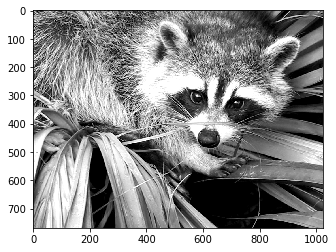

In [4]:
plt.imshow(f, cmap='gray', vmin=30, vmax=200)  
plt.show()

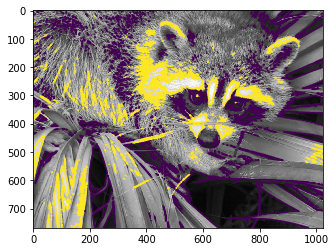

In [5]:
plt.contour(f, [50, 200]) # if alone use [::-1]
plt.imshow(f, cmap='gray') 
plt.show()

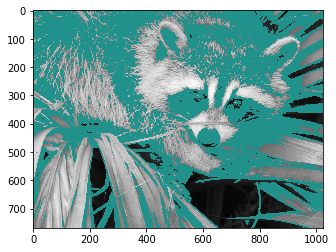

In [6]:
plt.contourf(f, [50, 100]) # filled contour
plt.imshow(f, cmap='gray') 
plt.show()

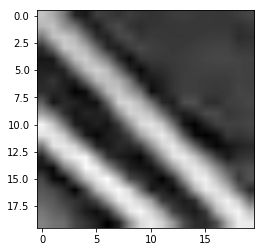

In [7]:
plt.imshow(f[320:340, 510:530], cmap='gray', interpolation='bilinear') #smooth intensity variations
plt.show()

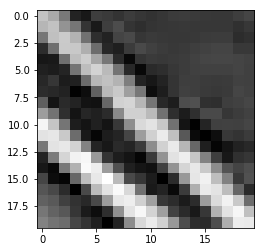

In [8]:
plt.imshow(f[320:340, 510:530], cmap='gray', interpolation='nearest') #abrupt intensity variations
plt.show()

In [9]:
blurred_face = ndimage.gaussian_filter(f, sigma=3)
very_blurred = ndimage.gaussian_filter(f, sigma=10)
local_mean = ndimage.uniform_filter(f, size=11)

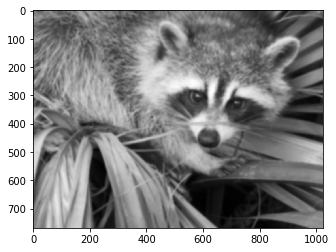

In [10]:
plt.imshow(blurred_face, cmap='gray') 
plt.show()

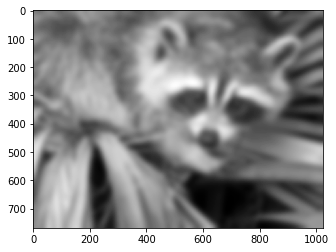

In [11]:
plt.imshow(very_blurred, cmap='gray') 
plt.show()

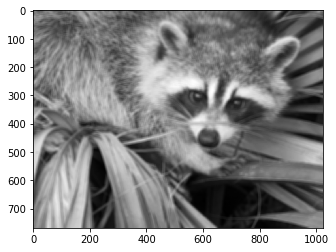

In [12]:
plt.imshow(local_mean, cmap='gray') 
plt.show()

In [13]:
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

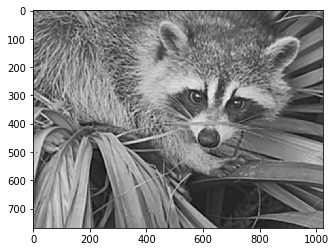

In [14]:
plt.imshow(sharpened, cmap='gray') 
plt.show()

In [15]:
g = f[230:290, 220:320]
noisy = g + 0.4 * g.std() * np.random.random(g.shape)
med_denoised = ndimage.median_filter(noisy, 3)

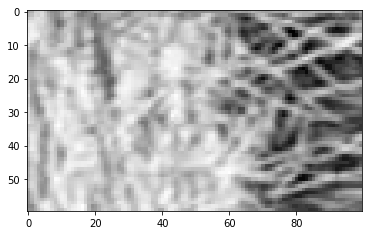

In [16]:
plt.imshow(g, cmap='gray') 
plt.show()

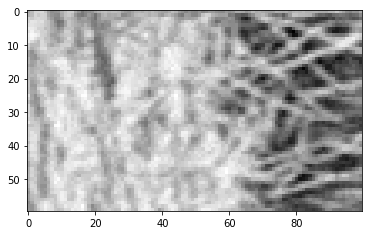

In [17]:
plt.imshow(noisy, cmap='gray') 
plt.show()

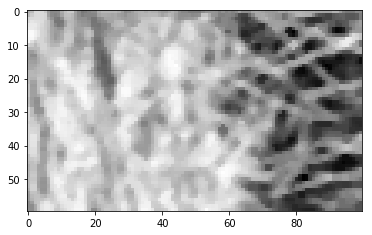

In [18]:
plt.imshow(med_denoised, cmap='gray') 
plt.show()

# OpenCV

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb
from matplotlib import cm
from matplotlib import colors
import cv2

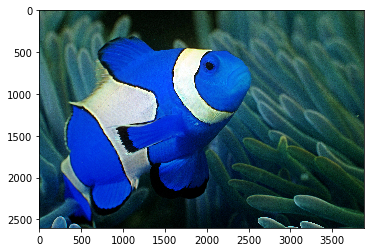

In [20]:
blue_nemo = cv2.imread('./nemo/nemo0.jpg')
plt.imshow(blue_nemo)
plt.show()

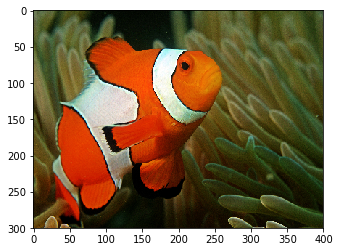

In [21]:
nemo = cv2.cvtColor(blue_nemo, cv2.COLOR_BGR2RGB)
nemo = cv2.resize(nemo, (400,300))
plt.imshow(nemo)
plt.show()

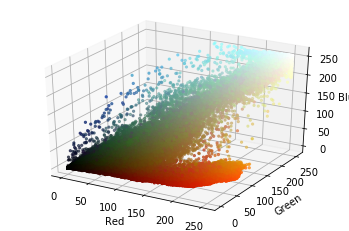

In [22]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

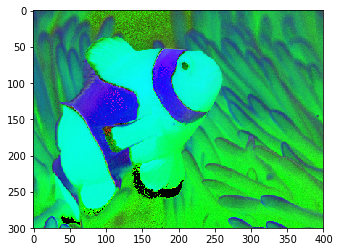

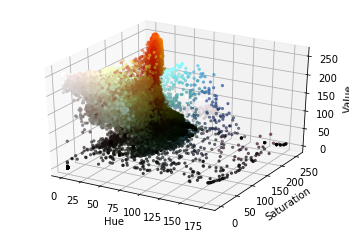

In [23]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_nemo)
plt.show()
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

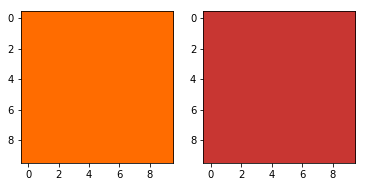

In [24]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)


lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [25]:
def segment_fish(image):
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

In [26]:
path = "./nemo/nemo"
images = []
for i in range(8):
    fish = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
    images.append(fish)

In [27]:
results = [segment_fish(fishes) for fishes in images]

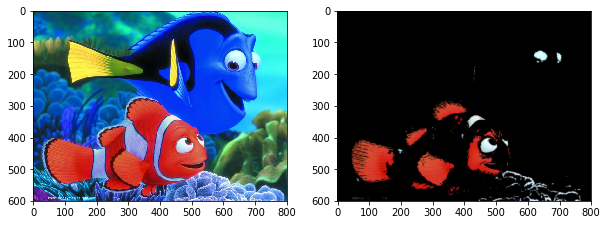

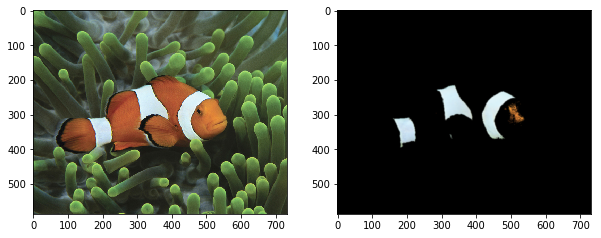

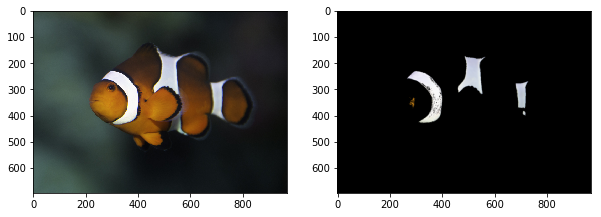

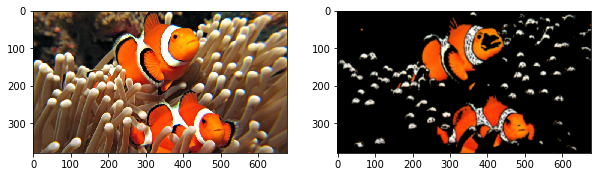

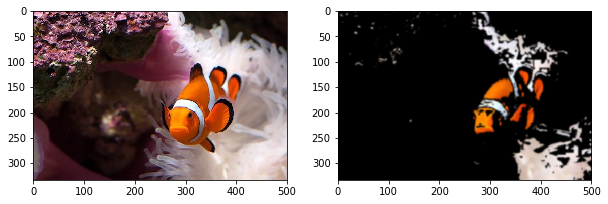

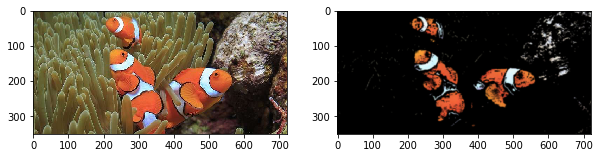

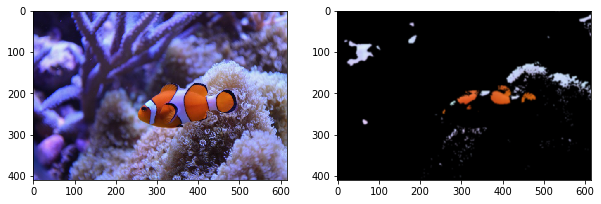

In [28]:
for i in range(8):
    plt.figure(figsize = (10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(images[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

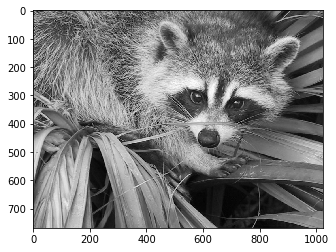

In [30]:
racoon = cv2.imread('face.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(racoon,cmap = 'gray')
plt.show()

In [31]:
def convolution(image, kernel, stride):
    feature_map = np.zeros((int(np.ceil((np.shape(image)[0] - np.shape(kernel)[0] + 1)/stride[0])), int(np.ceil((np.shape(image)[1] - np.shape(kernel)[1] + 1)/stride[1]))))
    h_counter, v_counter = 0, 0
    h_pixel, v_pixel = 0, 0
    while v_pixel <= np.shape(image)[0] - np.shape(kernel)[0]:
        while h_pixel <= np.shape(image)[1] - np.shape(kernel)[0]:
            array = image[v_pixel:(np.shape(kernel)[0] + v_pixel), h_pixel:(np.shape(kernel)[1] + h_pixel)]
            feature_map[v_counter][h_counter] = np.sum(np.multiply(array, kernel))
            h_counter += 1
            h_pixel += stride[0]
        h_counter = 0
        h_pixel = 0
        v_counter += 1
        v_pixel += stride[1]
    return(feature_map)

def maxpooling(image, pool):
    pooled = np.zeros((int(np.ceil(np.shape(image)[0]/pool[0])), int(np.ceil(np.shape(image)[1]/pool[1]))))
    h_counter, v_counter = 0, 0
    h_pixel, v_pixel = 0, 0
    while v_pixel <= np.shape(image)[0] - pool[0]:
        while h_pixel <= np.shape(image)[1] - pool[1]:
            array = image[v_pixel:pool[0] + v_pixel, h_pixel:pool[1] + h_pixel]
            pooled[v_counter][h_counter] = np.max(array)
            print
            h_counter += 1
            h_pixel += pool[0]
        h_counter = 0
        h_pixel = 0
        v_counter += 1
        v_pixel += pool[1]
    return(pooled)

def globalaverage(images):
    result = []
    for image in images:
        result.append(np.sum(image)/(np.shape(image)[0]*np.shape(image)[1]))
    return result

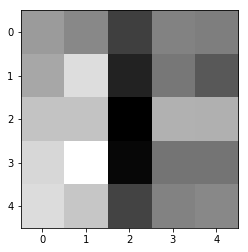

In [32]:
neural1 = np.array([[ 0.04400257, -0.00336761, -0.18363796, -0.01787782, -0.02640942],
 [ 0.07376727,  0.20624828, -0.25315145, -0.04475818, -0.12154948],
 [ 0.14463837,  0.14452825, -0.3386674,   0.0985871,   0.0958617 ],
 [ 0.19223003,  0.29104954, -0.32088047, -0.05263963, -0.0510585 ],
 [ 0.20275575,  0.1497889,  -0.17301331, -0.01850685, -0.00285556]])
plt.imshow(neural1, cmap = 'gray')
plt.show()

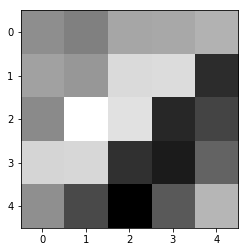

In [33]:
neural2 = np.array([[ 0.00233846, -0.03677582,  0.07444576,  0.07842619,  0.10935032],
 [ 0.05983903,  0.02822839,  0.22490913,  0.23143296, -0.28389242],
 [-0.00844548,  0.3347839,   0.24547052, -0.29634032, -0.21204405],
 [ 0.21038643,  0.21606605, -0.27235252, -0.33269647, -0.12282492],
 [ 0.0055936,  -0.19799176, -0.41310427, -0.15084669,  0.12049493]])
plt.imshow(neural2, cmap = 'gray')
plt.show()

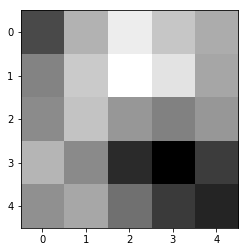

In [34]:
neural3 = np.array([[-0.1651418,   0.08974278,  0.23312381,  0.1381781,   0.07521749],
 [-0.02511639,  0.14639182,  0.2777737,   0.21147218,  0.05947994],
 [-0.00654726,  0.13182409,  0.02275676, -0.02992135,  0.02430742],
 [ 0.09618697, -0.0078972,  -0.24311925, -0.3453544,  -0.19597037],
 [ 0.0066,      0.06246207, -0.0711794,  -0.20380044, -0.25719312]])
plt.imshow(neural3, cmap = 'gray')
plt.show()

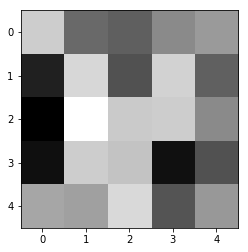

In [35]:
neural4 = np.array([[ 0.16625871, -0.08084971, -0.10633703,  0.00061888,  0.03954468],
       [-0.2614211 ,  0.19120315, -0.13957448,  0.17868708, -0.1028334 ],
       [-0.34052777,  0.28982675,  0.15715504,  0.16640751,  0.00042901],
       [-0.3022562 ,  0.1662176 ,  0.14137219, -0.30078486, -0.14047396],
       [ 0.07048088,  0.05437493,  0.1960908 , -0.13132526,  0.03606145]])
plt.imshow(neural4, cmap = 'gray')
plt.show()

In [36]:
neuralimg1 = convolution(racoon, neural1, (2,2))
reduced1 = maxpooling(neuralimg1, (2,2))
neuralimg11 = convolution(reduced1, neural4, (2,2))
reduced11 = maxpooling(neuralimg11, (2,2))

In [37]:
neuralimg2 = convolution(racoon, neural2, (2,2))
reduced2 = maxpooling(neuralimg2, (2,2))
neuralimg22 = convolution(reduced2, neural1, (2,2))
reduced22 = maxpooling(neuralimg22, (2,2))

In [38]:
neuralimg3 = convolution(racoon, neural3, (2,2))
reduced3 = maxpooling(neuralimg3, (2,2))
neuralimg33 = convolution(reduced3, neural2, (2,2))
reduced33 = maxpooling(neuralimg22, (2,2))

In [39]:
neuralimg4 = convolution(racoon, neural4, (2,2))
reduced4 = maxpooling(neuralimg4, (2,2))
neuralimg44 = convolution(reduced4, neural3, (2,2))
reduced44 = maxpooling(neuralimg44, (2,2))

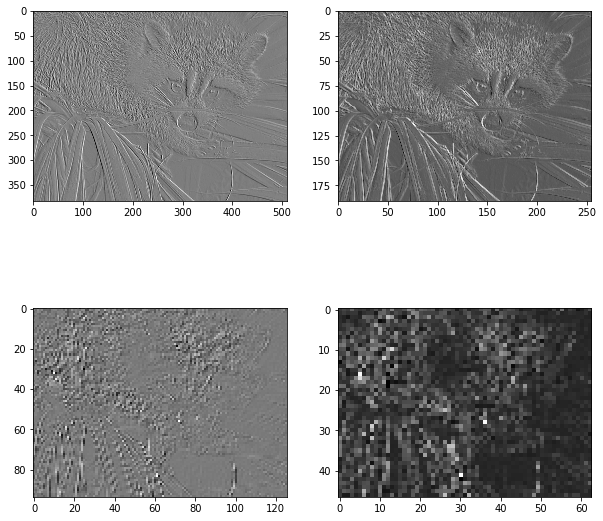

In [40]:
plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.imshow(neuralimg1, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(reduced1, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(neuralimg11, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(reduced11, cmap = 'gray')
plt.show()

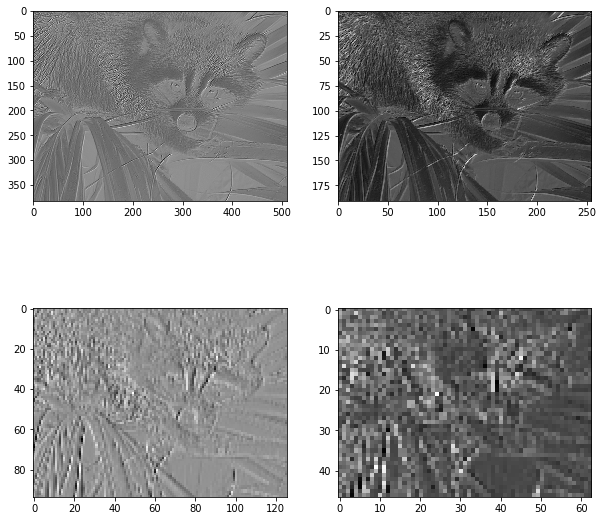

In [41]:
plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.imshow(neuralimg2, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(reduced2, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(neuralimg22, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(reduced22, cmap = 'gray')
plt.show()

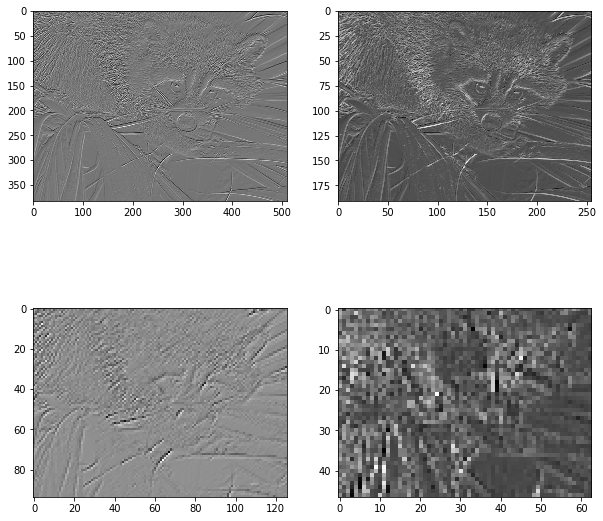

In [42]:
plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.imshow(neuralimg3, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(reduced3, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(neuralimg33, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(reduced33, cmap = 'gray')
plt.show()

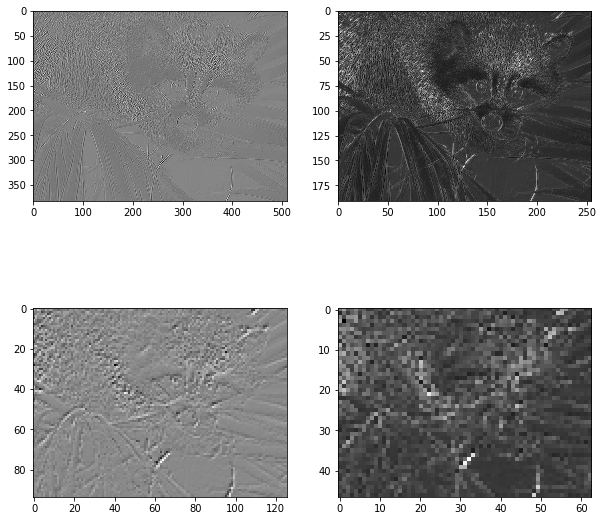

In [43]:
plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.imshow(neuralimg4, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(reduced4, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(neuralimg44, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(reduced44, cmap = 'gray')
plt.show()

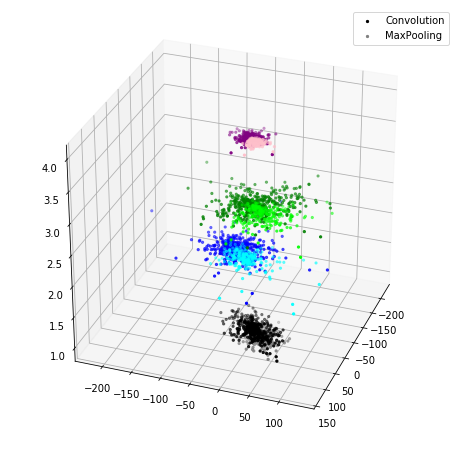

In [44]:
fig = plt.figure(figsize = (8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(neuralimg1[0], neuralimg1[1], 1, marker=".", c = 'black', label = 'Convolution')
axis.scatter(neuralimg2[0], neuralimg2[1], 2, marker=".", c = 'blue')
axis.scatter(neuralimg3[0], neuralimg3[1], 3, marker=".", c = 'green')
axis.scatter(neuralimg4[0], neuralimg4[1], 4, marker=".", c = 'purple')
axis.scatter(reduced1[0], reduced1[1], 1, marker=".", c = 'gray', label = 'MaxPooling')
axis.scatter(reduced2[0], reduced2[1], 2, marker=".", c = 'cyan')
axis.scatter(reduced3[0], reduced3[1], 3, marker=".", c = 'lime')
axis.scatter(reduced4[0], reduced4[1], 4, marker=".", c = 'pink')
axis.view_init(30, 20)
axis.legend()
plt.show()

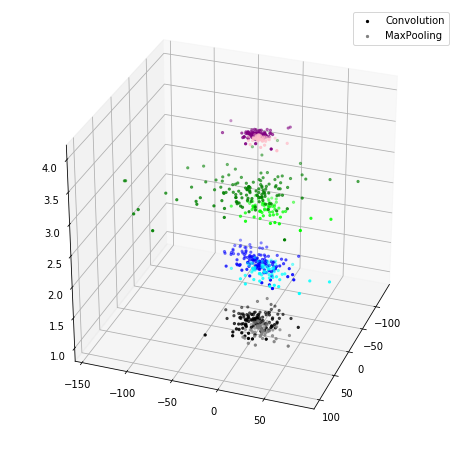

In [45]:
fig = plt.figure(figsize = (8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(neuralimg11[0], neuralimg11[1], 1, marker=".", c = 'black', label = 'Convolution')
axis.scatter(neuralimg22[0], neuralimg22[1], 2, marker=".", c = 'blue')
axis.scatter(neuralimg33[0], neuralimg33[1], 3, marker=".", c = 'green')
axis.scatter(neuralimg44[0], neuralimg44[1], 4, marker=".", c = 'purple')
axis.scatter(reduced11[0], reduced11[1], 1, marker=".", c = 'gray', label = 'MaxPooling')
axis.scatter(reduced22[0], reduced22[1], 2, marker=".", c = 'cyan')
axis.scatter(reduced33[0], reduced33[1], 3, marker=".", c = 'lime')
axis.scatter(reduced44[0], reduced44[1], 4, marker=".", c = 'pink')
axis.view_init(30, 20)
axis.legend()
plt.show()

In [46]:
final1 = globalaverage([reduced11, reduced22, reduced33, reduced44])

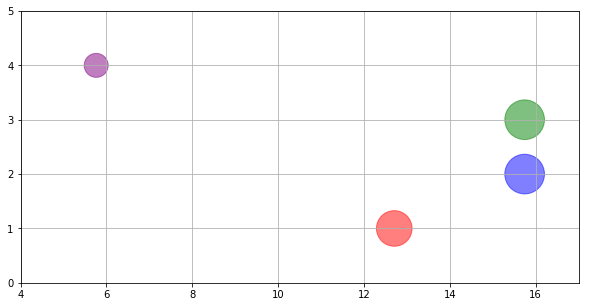

In [47]:
plt.figure(figsize = (10,5))
plt.scatter(final1, [1,2,3,4], c = ['red','blue','green','purple'], alpha = 0.5, s = np.multiply(final1,100))
plt.ylim(0,5)
plt.xlim(4,17)
plt.grid()
plt.show()